# Time Series Analysis  
  
For a full analysis and comprehensive analysis of the campaign donations given to Trump this notebook will focus on a time series analysis. I will be looking for trends and patterns in donations. 

The work flow will go as follows:  
  
> - [Import Datasets](#importing_data)
> - [Time Series Plot](#plot)
> - [Seasonal Decomposition](#season)
> - [Autocorrelation/Partial Autocorrelation](#acf)
> - [Prophet Analysis](#prophet)
> - [Conclusions](#conclusions)

In [79]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from my_functions import plot_series
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from fbprophet import Prophet
import warnings
warnings.filterwarnings("ignore")
# This will allow us to avoid a FutureWarning when plotting.
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
sns.set()

<a id='importing_data'></a>
## Import data

In [60]:
df = pd.read_csv('../datasets/full_dataset.csv')

In [61]:
#Reset index to Datetime. 
df['Date']= pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.sort_index(inplace=True,ascending=True)

<a id='plot'></a>
## Plot of  Trump's daily campaign contributions 

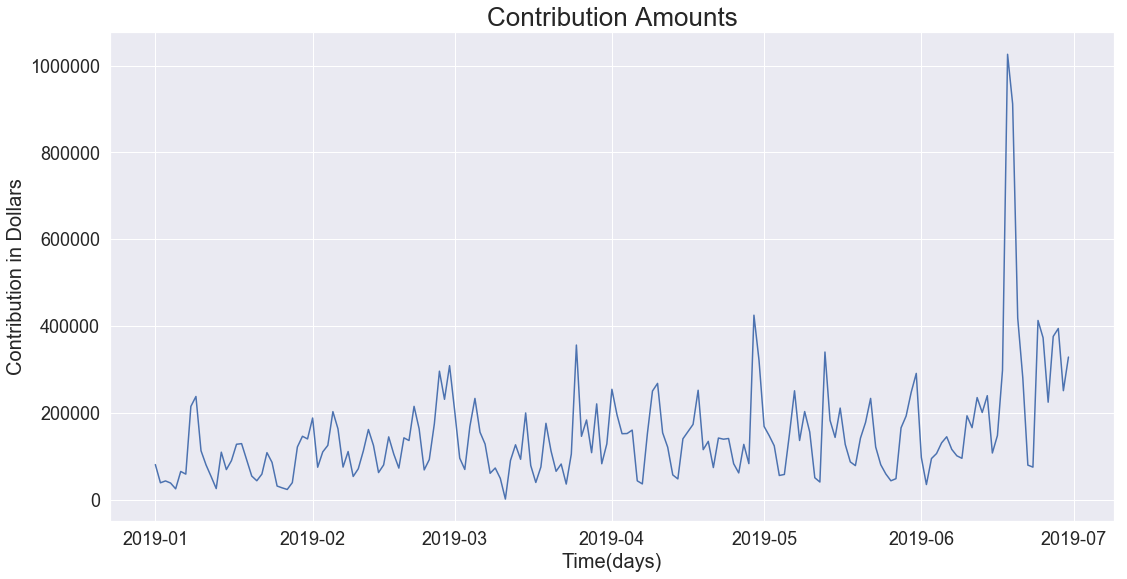

In [62]:
plot_series(df, ['contribution_receipt_amount'], title = 'Contribution Amounts',
            xlab='Time(days)',ylab='Contribution in Dollars')


> As discovered in the initial EDA of the data there is an outlier around June 18th. There might also be some seasonality about once per week, but it is hard to tell. If there is a trend it is difficult to distinguish and will have to be analyzed more.

<a id='season'></a>
## Seasonal decomposition

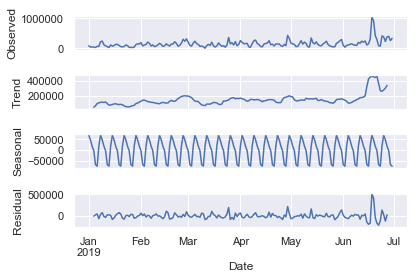

In [63]:
# Decompose time series into trend, seasonal, and residual components.
decomp = seasonal_decompose(df['contribution_receipt_amount'])

# Plot the decomposed time series.
decomp.plot();

> Looking at the seasonal decomposition of the year's contributions there does look like a strong weekly donation pattern. This suggests that trump gets a bump in donations once per week. Again, there doesn't seem to be any trend in the donations. 

<a id='acf'></a>
## Looking at Autocorrelation and Partial Auto Correlation

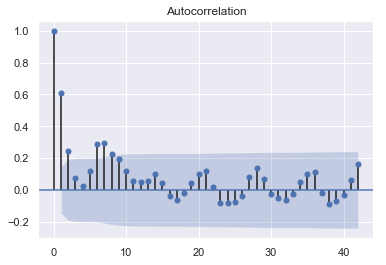

In [64]:
# Generate the ACF plot on contribution data
# up to 20 time periods.
plot_acf(df['contribution_receipt_amount'], lags = 42);

> There is a correlation between the $Y_t$ and $Y_{t-1}$ and $Y_{t-2}$ and then there is a correlation to the donation a week later. This plot also confirms that there might be a weekly pattern to donations, but there is no significant correlation to donations after one week.

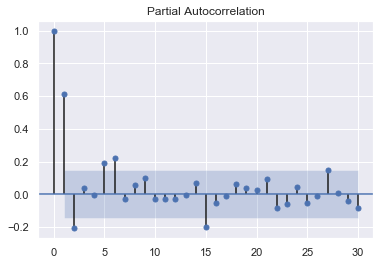

In [65]:
# Generate the ACF plot on contribution data
# up to 20 time periods.
plot_pacf(df['contribution_receipt_amount'], lags = 30);

> There doesn't seem to be much information gained from the partial auto correlation.

<a id='prophet'></a>
## Use Prophet to confirm trends and seasonality

In [70]:
df.reset_index(inplace=True)

In [71]:
#Prep columns for Prophet 
df['ds']= df['Date']
#Create a new column to combine today's tweets with the following day's campaign tweets.
df['y'] = df['contribution_receipt_amount'].shift()

In [73]:
#Create dataframe for Prophet to read.
df1= df[['ds','y']]

In [80]:
df1.dropna(inplace=True)

In [83]:
#Instaniate and fit Prophet.
m = Prophet(yearly_seasonality=True,daily_seasonality=True)
m.fit(df1)
future = m.make_future_dataframe(periods = 30)

In [84]:
#Create predictions
forecast = m.predict(future)

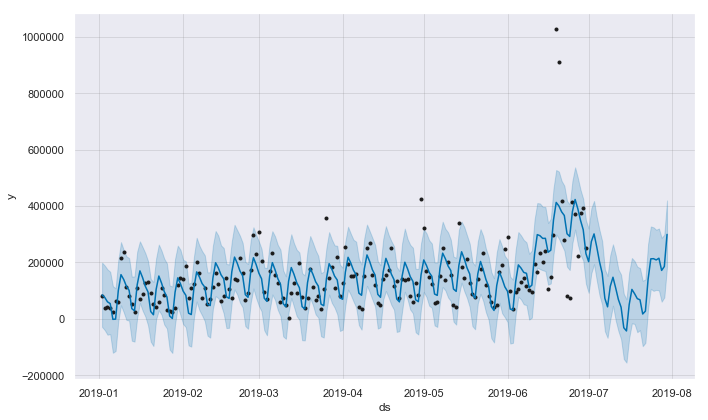

In [85]:
m.plot(forecast);

> it's difficult to see any trends in this model, but there is more confirmation of some weekly seasonality. Also, given this model there look like a decrease in Trump's donations in July. This information won't be released until the end of the third quarter of 2019. 

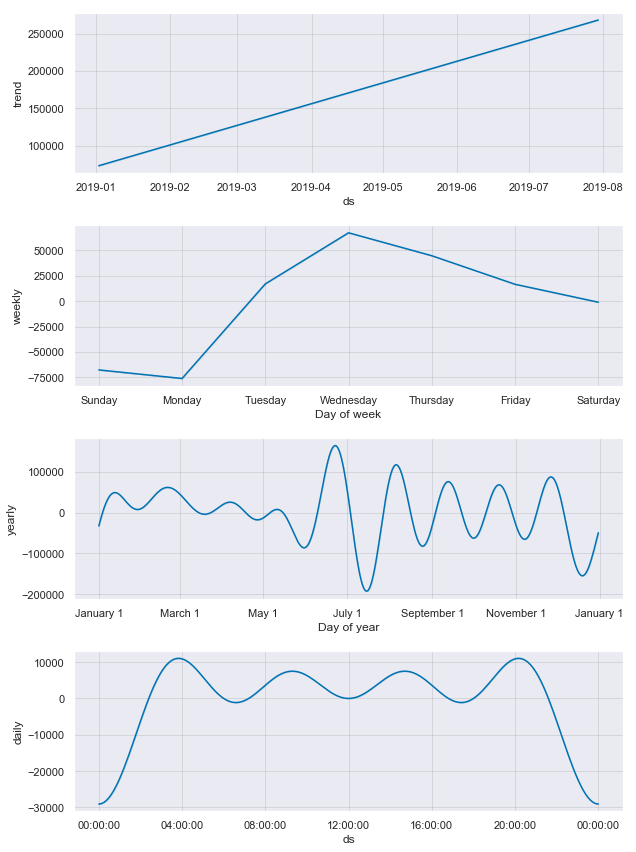

In [86]:
m.plot_components(forecast);

> There does look like a positive trend in Trump's donations. And again more confirmation that there is a weekly trend. It appears that he gets his highest donations in the middle of the week on Wednesdays.

<a id='conclusions'></a>
## Conclusions

The time series analysis confirmed a few things. First, there does seem to be weekly seasonality with Trump's donations, seeing up-ticks on Wednesdays. His donations are trending upwards. That being said, it could have something to do with the 2020 presidential election getting closer. It would be expected that contributions would be higher closer to election day.